# xSDR: Speaker-Independent Spoken Digit Recognition
This is our solution for the final graded project for the WS22/23 course "_Neural Networks: Theory and Implementation_" at Saarland University.
<br/>
Authors: _Christian Singer, Mhd Jawad Al Rahwanji_
`{chsi00002, mhal00002}@stud.uni-saarland.de`
<br/>
<img src="xSDR.png" height=333>

##### Before we start, we'd like to point out a couple of things:

-- An **Introduction** to the project can be found in `README.md`

-- Some preliminary **Data Exploration** can be found in `DataExploration.ipynb`

### Imports

In [315]:
# add this to ignore warnings from Librosa
import warnings
import os

warnings.filterwarnings('ignore')

In [316]:
base = os.getcwd()

### Task I

In [317]:
# I.1

from model_baseline.data_loading import downsample_spectrogram

downsample_spectrogram

<function model_baseline.data_loading.downsample_spectrogram(spectrogram, num_frames)>

In [318]:
# I.2

from model_baseline.data_loading import create_features

create_features

<function model_baseline.data_loading.create_features(split, num_mels=13, num_frames=10, lazy_mode=True)>

In [319]:
# I.3

from model_baseline.linear_model import classifier

"""
Both penalty and loss parameters were experimented with,
"elasticnet" and "modified_huber" were chosen, respectively.
"""
classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(loss='modified_huber', n_jobs=-1,
                               penalty='elasticnet'))])

In [320]:
# I.4

os.chdir(base + '/model_baseline')
%run 'linear_model.py'
os.chdir(base)

"""
Confusion matrix analysis:

- Train set CM: We can see that most of the support is concentrated on the diagonal which reflects a very good fit. Nevertheless, there exists some miss-classifications here and there, most notably, struggles with (1-4, 1-7, 1-9) and (8-3, 8-6). All of which can be seen in the precision, recall and f1-score values from the train set report.

- Dev & Test set CMs: In contrast to train set CMs, dev and test CMs exhibit more miss-classifications and amplified confusions. Namely, (1-4, 1-9), (4-1), (5-9), (6-8), (8-3, 8-6) and maybe (9). All of which is reflected in the precision, recall and f1-score values from the dev and test set reports.
"""

----------------------------------TRAIN-SET----------------------------------------
Confusion matrix:
[[162   1  29   2   0   1   0   3   0   2]
 [  0 163   1   0   1   2   0   3   1  29]
 [  0   5 189   6   0   0   0   0   0   0]
 [  0   0  21 139   0   0   0   5  17  18]
 [  1  32   2   0 159   0   1   1   0   4]
 [  0   4   0   0   0 178   0   0   0  18]
 [  0   0   0   5   1   0 162   5  26   1]
 [  1   7   1   0   1   3   3 148   5  31]
 [  0   0   0   0   0   1  13   3 182   1]
 [  0   0   0   0   0   1   0   2   1 196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       200
           1       0.77      0.81      0.79       200
           2       0.78      0.94      0.85       200
           3       0.91      0.69      0.79       200
           4       0.98      0.80      0.88       200
           5       0.96      0.89      0.92       200
           6       0.91      0.81      0.85       200
          

'\nConfusion matrix analysis:\n\n- Train set CM: We can see that most of the support is concentrated on the diagonal which reflects a very good fit. Nevertheless, there exists some miss-classifications here and there, most notably, struggles with (1-4, 1-7, 1-9) and (8-3, 8-6). All of which can be seen in the precision, recall and f1-score values from the train set report.\n\n- Dev & Test set CMs: In contrast to train set CMs, dev and test CMs exhibit more miss-classifications and amplified confusions. Namely, (1-4, 1-9), (4-1), (5-9), (6-8), (8-3, 8-6) and maybe (9). All of which is reflected in the precision, recall and f1-score values from the dev and test set reports.\n'

### Task II

In [321]:
# II.1

from model_neural.transformer_model import TransformerModel
from model_neural.conv1d_model import Conv1dModel, Conv1dMelModel

# TODO: Await TransformerModel fix...

print(Conv1dModel) # For exploration purposes, a raw input Conv1d was developed
print(Conv1dMelModel)

print(TransformerModel)

"""
Answers to sub-questions:

- Yes, both neural models outperform our baseline model. More on that in the next cell.

- Yes, we can clearly see Conv1d over-fit to the train data having an accuracy score of 0.99 compared to its accuracy scores, 0.76 and 0.80 on dev and test sets, respectively.

TODO: Fill with answer to:  "How do the hyperparameters affect the model performance?"
"""

<class 'model_neural.conv1d_model.Conv1dModel'>
<class 'model_neural.conv1d_model.Conv1dMelModel'>
<class 'model_neural.transformer_model.TransformerModel'>


'\nAnswers to sub-questions:\n\n- Yes, both neural models outperform our baseline model. More on that in the next cell.\n\n- Yes, we can clearly see Conv1d over-fit to the train data having an accuracy score of 0.99 compared to its accuracy scores, 0.76 and 0.80 on dev and test sets, respectively.\n\nTODO: Fill with answer to:  "How do the hyperparameters affect the model performance?"\n'

In [322]:
# II.2

# TODO: Await TransformerModel fix...

os.chdir(base + '/model_neural')
%run 'classification_report.py'
os.chdir(base)

"""
Neural-Baseline model comparison:

- Conv1d vs Baseline: Conv1d scored 0.99, 0.78 and 0.81 on train, dev and test sets respectively in terms of accuracy. Compared to the baseline's 0.86, 0.50 and 0.57, Conv1d is clearly superior. Furthermore, Conv1d features a cleaner CM with almost all the support concentrated on the diagonal across all sets. As for the precision, recall and f1-score values, Conv1d, also, mirrors its improved CM with an accordingly robust metric report. Although, it is important to mention that the model still confuses (6) and (8) on dev and test sets as the baseline did.

- Transformer vs Baseline:

"""

Using: 'cpu' as device for report.
------------------- Conv1dMelModel report -------------------

Confusion matrix of train-set:
 tensor([[196,   0,   3,   0,   0,   0,   1,   0,   0,   0],
        [  0, 200,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0, 199,   1,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 199,   0,   0,   1,   0,   0,   0],
        [  0,   0,   0,   0, 197,   0,   3,   0,   0,   0],
        [  0,   0,   0,   0,   0, 192,   8,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 200,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   2, 198,   0,   0],
        [  0,   0,   0,   0,   0,   0,   6,   0, 194,   0],
        [  0,   1,   0,   3,   0,   0,   1,   0,   0, 195]])

Classification report: train-set:
 class   precision   recall   f1-score
     0      1.00       0.98       0.99       
     1      1.00       1.00       1.00       
     2      0.99       1.00       0.99       
     3      0.98       1.00       0.99       
     4     

"\nNeural-Baseline model comparison:\n\n- Conv1d vs Baseline: Conv1d scored 0.99, 0.78 and 0.81 on train, dev and test sets respectively in terms of accuracy. Compared to the baseline's 0.86, 0.50 and 0.57, Conv1d is clearly superior. Furthermore, Conv1d features a cleaner CM with almost all the support concentrated on the diagonal across all sets. As for the precision, recall and f1-score values, Conv1d, also, mirrors its improved CM with an accordingly robust metric report. Although, it is important to mention that the model still confuses (6) and (8) on dev and test sets as the baseline did.\n\n- Transformer vs Baseline:\n\n"

Using: 'cpu' as device for report.
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.000s...
[t-SNE] Computed neighbors for 500 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 12.233127
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.704926
[t-SNE] KL divergence after 300 iterations: 0.218815


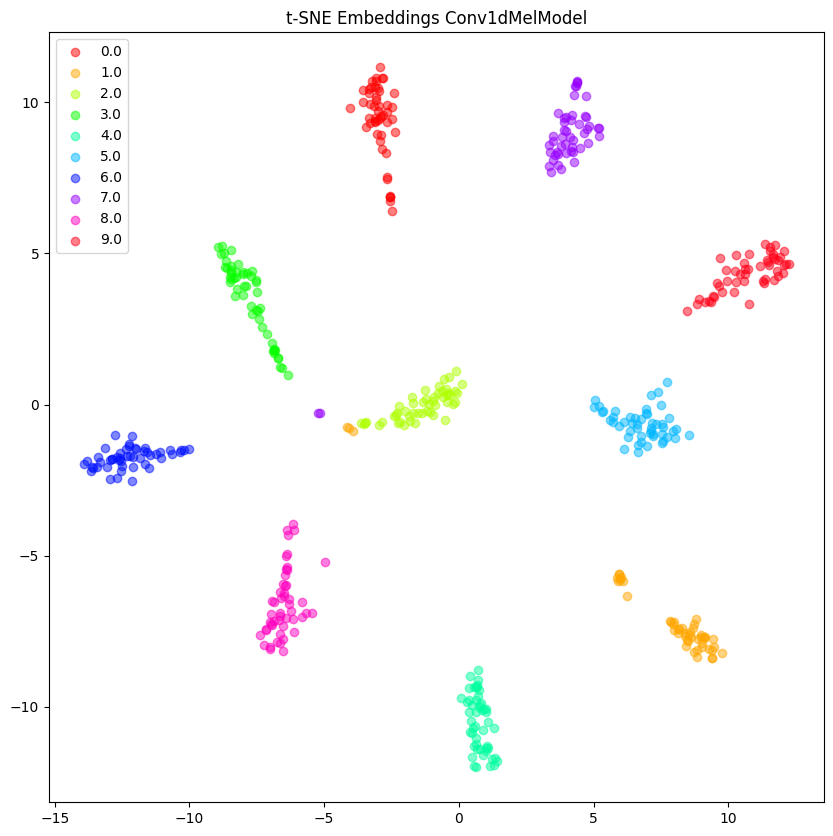

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.000s...
[t-SNE] Computed neighbors for 500 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.805970
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.432869
[t-SNE] KL divergence after 300 iterations: 0.587780


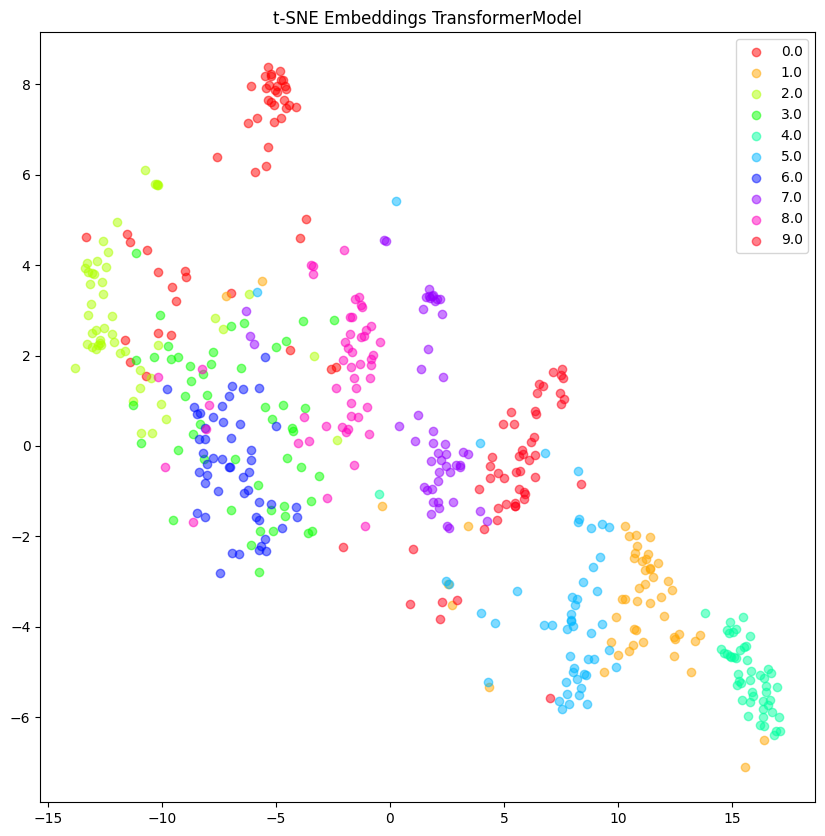

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 30.252764
[t-SNE] KL divergence after 300 iterations: -0.722199


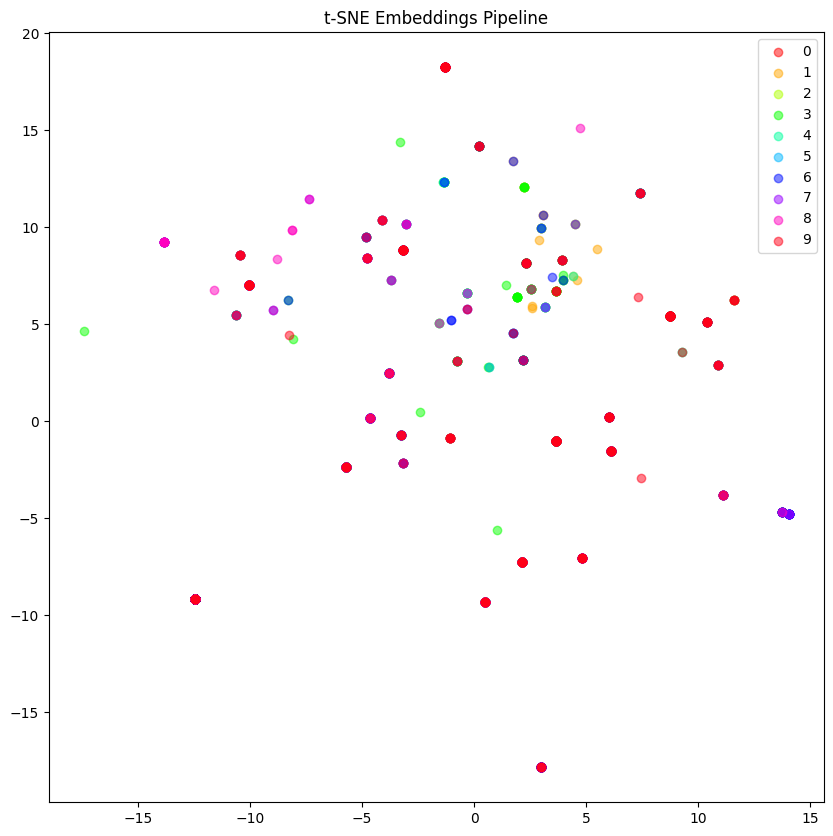

'\nModel class separation comparison:\n\n- Conv1d: We can see that the model did a great job separating the different digits in latent space. There exists a slight confusion here and there but overall the classes were clearly well separated.\n\n- Transformer:\n\n- Baseline: This model did a poor job at separation even on the train set we are unable to see clear clusters of classes.\n'

In [323]:
# II.3

# TODO: Await TransformerModel fix...

os.chdir(base + "/comparative_analysis")
%run 'tsne_model_embeddings.py'
os.chdir(base)

"""
Model class separation comparison:

- Conv1d: We can see that the model did a great job separating the different digits in latent space. There exists a slight confusion here and there but overall the classes were clearly well separated.

- Transformer:

- Baseline: This model did a poor job at separation even on the train set we are unable to see clear clusters of classes.
"""

In [328]:
# II.4

# TODO: Await TransformerModel fix...

os.chdir(base + "/comparative_analysis")
%run 'statistical_significance_test.py'
os.chdir(base)

RuntimeError: stack expects each tensor to be equal size, but got [39, 59] at entry 0 and [39, 50] at entry 1

### Task III

In [325]:
# III.1

# Answers to subquestions first:
# TODO: Await latest model evaluations...
# TODO: Fill with answer to:  "What do you observe?"
# TODO: Fill with answer to:  "How does this affect the model performance?"
# TODO: Discuss the above observations after reporting them

# TODO: Retrain all 3 using new dataloader

In [326]:
# III.2

# TODO: Complete.

In [327]:
# III.3

# TODO: Complete.